In [1]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import itertools

### Method

In [2]:
# labeling on plot bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
# Change type to index    
def type_to_index(raw):
    if raw=="Ghoul":
        return 0
    elif raw=="Ghost":
        return 1
    else :
        return 2
    
    
    
# Confusion matrix
# Showing confusion matrix
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
# Draw 3D Plot
def draw_3d_plot(pca_df, pca_model, angle_1,angle_2):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    model_pred_0 = pca_df[pca_df["kmean_result"]==0]
    model_pred_1 = pca_df[pca_df["kmean_result"]==1]
    model_pred_2 = pca_df[pca_df["kmean_result"]==2]

    X_1 = model_pred_0.f1
    Y_1 = model_pred_0.f2
    Z_1 = model_pred_0.f3

    X_2 = model_pred_1.f1
    Y_2 = model_pred_1.f2
    Z_2 = model_pred_1.f3

    X_3 = model_pred_2.f1
    Y_3 = model_pred_2.f2
    Z_3 = model_pred_2.f3

    ax.scatter(X_1,Y_1,Z_1, color="r")
    ax.scatter(X_2,Y_2,Z_2, color="b")
    ax.scatter(X_3,Y_3,Z_3, color="orange")
    ax.plot([0,pca_model.components_[0,0]],[0,pca_model.components_[1,0]],[0,pca_model.components_[2,0]], color="r")
    ax.plot([0,pca_model.components_[0,1]],[0,pca_model.components_[1,1]],[0,pca_model.components_[2,1]], color="r")
    ax.plot([0,pca_model.components_[0,2]],[0,pca_model.components_[1,2]],[0,pca_model.components_[2,2]], color="r")
    ax.plot([0,pca_model.components_[0,3]],[0,pca_model.components_[1,3]],[0,pca_model.components_[2,3]], color="r")

    ax.text(pca_model.components_[0,0],pca_model.components_[1,0],pca_model.components_[2,0],"bone_length", color="g",ha="center", va="center")
    ax.text(pca_model.components_[0,1],pca_model.components_[1,1],pca_model.components_[2,1],"rotting_flesh", color="g",ha="center", va="center")
    ax.text(pca_model.components_[0,2],pca_model.components_[1,2],pca_model.components_[2,2],"hair_length", color="g",ha="center", va="center")
    ax.text(pca_model.components_[0,3],pca_model.components_[1,3],pca_model.components_[2,3],"has_soul", color="g",ha="center", va="center")
    
    ax.view_init(angle_1, angle_2)
    plt.show()

# Clustering Modeling

### 목차

    1. 데이터 설명
    2. 데이터 분포
    3. Clustering
    4. 결과
    5. Advanced

데이터만으로 Clustering을 했을 때, 분류된 Label과 실제 Label의 차이를 비교해 어떻게 분류되는지를 분석하고 결과에 영향을 끼친 특성을 분석

# 1. Data Description

데이터 출처 : 캐글 오픈 데이터\
칼럼 설명 :
    1. id : 레코드 ID
    2. bone_length, rotting_flesh, hair_length, has_soul, color : 레코드의 특성
    3. type : target

In [3]:
data = pd.read_csv("./Data/train.csv")
print(data.shape)
data.head()

FileNotFoundError: [Errno 2] File b'./Data/train.csv' does not exist: b'./Data/train.csv'

# 2. Data Distribution

bone_length kde_dist_plot


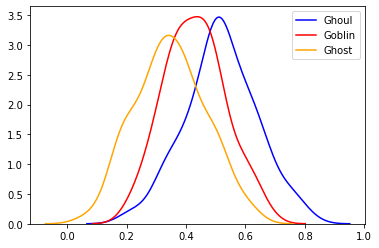

rotting_flesh kde_dist_plot


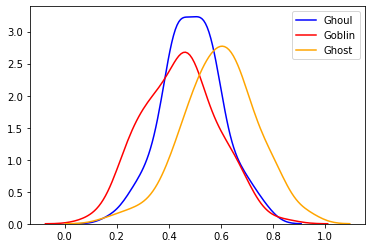

hair_length kde_dist_plot


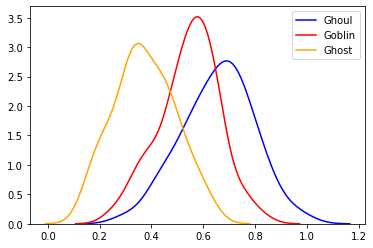

has_soul kde_dist_plot


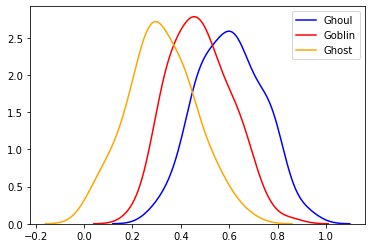

In [4]:
data_ghoul = data[data.type=="Ghoul"]
data_goblin = data[data.type=="Goblin"]
data_ghost = data[data.type=="Ghost"]

col_list = data.columns[1:-1]

for col in col_list[:-1]:
    print(col + " kde_dist_plot")
    sns.kdeplot(data_ghoul[col], color="b", label="Ghoul")
    sns.kdeplot(data_goblin[col], color="r", label="Goblin")
    sns.kdeplot(data_ghost[col], color="orange", label="Ghost")
    plt.show()

Feature 별로 데이터의 분포가 어느정도 차이가 남을 확인

In [5]:
data[["id","color","type"]].groupby(["type","color"]).count()['id']

type    color
Ghost   black    14
        blood     6
        blue      6
        clear    32
        green    15
        white    44
Ghoul   black    14
        blood     4
        blue      6
        clear    42
        green    13
        white    50
Goblin  black    13
        blood     2
        blue      7
        clear    46
        green    14
        white    43
Name: id, dtype: int64

/Users/jaemin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaemin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


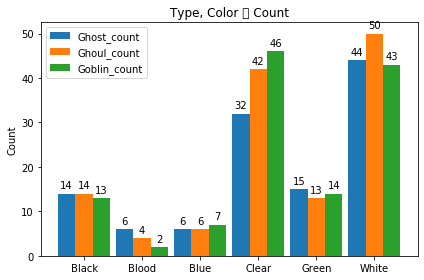

In [6]:
labels = ['Black', 'Blood', 'Blue', 'Clear', 'Green', 'White']
Ghost_count = data[["id","color","type"]].groupby(["type","color"]).count()['id'][:6]
Ghoul_count = data[["id","color","type"]].groupby(["type","color"]).count()['id'][6:12]
Goblin_count = data[["id","color","type"]].groupby(["type","color"]).count()['id'][12:]

width=0.3
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Ghost_count, width, label='Ghost_count')
rects2 = ax.bar(x , Ghoul_count, width, label='Ghoul_count')
rects3 = ax.bar(x + width, Goblin_count, width, label='Goblin_count')

ax.set_ylabel('Count')
ax.set_title('Type, Color 별 Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

Type별로 색의 분포를 확인했으나,

White와 Black을 비교했을 때, 알 수 있듯이 세 Type 모두 White 색상이 더 많아 색만으로는 Clustering이 되지 않을 것으로 판단하고 배제했습니다.

# 3. Clustering

In [7]:
data_copy = data.copy()
data_copy["type_index"] = data["type"].apply(type_to_index)


x = data_copy.drop(columns=["id","color","type","type_index"])
true_y = data_copy.type_index
x.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
3,0.776652,0.508723,0.636766,0.884464
4,0.566117,0.875862,0.418594,0.636438


사용할 Feature 추출

### K-means

In [8]:
model = KMeans(n_clusters=3).fit(x)
model_pred = model.predict(x)

print(confusion_matrix(true_y, model_pred))

[[107   4  18]
 [  2 103  12]
 [ 38  18  69]]


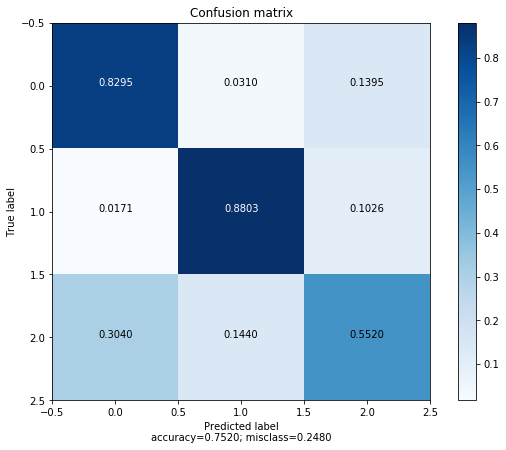

In [9]:
plot_confusion_matrix(confusion_matrix(true_y, model_pred))

Label 2로 지정한 Goblin이 잘 Clustering 되지 않음을 확인

### GaussianMixture

In [10]:
gm_cl = GaussianMixture(n_components=3, init_params='random', tol=1e-10,random_state=0,reg_covar=1e-4, max_iter=1000)
gm_cl.fit(x)
gm_cl_pred = gm_cl.predict(x)

print(confusion_matrix(true_y, gm_cl_pred))

[[  2 108  19]
 [ 84   2  31]
 [ 19  56  50]]


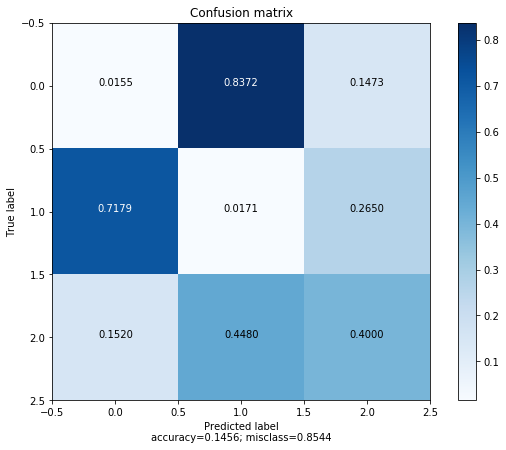

In [11]:
plot_confusion_matrix(confusion_matrix(true_y, gm_cl_pred))

마찬가지로 'Goblin' type이 Clustering되지 않음을 확인

# 4. Result

In [12]:
# PCA로 차원을 줄인 후 Label별 데이터 프레임 생성
pca = PCA(n_components=2)
pca_result=pca.fit_transform(x)

pca_df = pd.DataFrame(pca_result, columns=["f1","f2"])
pca_df["kmean_result"]=model_pred
pca_df["gm_presult"] = gm_cl_pred
pca_df["real"]=true_y

model_pred_0 = pca_df[pca_df["kmean_result"]==0]
model_pred_1 = pca_df[pca_df["kmean_result"]==1]
model_pred_2 = pca_df[pca_df["kmean_result"]==2]

gm_pred_0 = pca_df[pca_df["gm_presult"]==0]
gm_pred_1 = pca_df[pca_df["gm_presult"]==1]
gm_pred_2 = pca_df[pca_df["gm_presult"]==2]

true_0 = pca_df[pca_df["real"]==0]
true_1 = pca_df[pca_df["real"]==1]
true_2 = pca_df[pca_df["real"]==2]

시각화 하기 이해 DataFrame을 나누었습니다.

## K means 클러스터링 결과 시각화

### 2D Plot

In [ ]:
fig = plt.figure(figsize=(21,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

X_1 = model_pred_0.f1
Y_1 = model_pred_0.f2
X_2 = model_pred_1.f1
Y_2 = model_pred_1.f2
X_3 = model_pred_2.f1
Y_3 = model_pred_2.f2

ax1.scatter(X_1,Y_1, color="r",label="Ghoul")
ax1.scatter(X_2,Y_2, color="b",label="Ghost")
ax1.scatter(X_3,Y_3, color="orange",label="Goblin")
ax1.arrow(0,0,pca.components_[0,0], pca.components_[1,0], color="g", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,1]*0.4, pca.components_[1,1]*0.4, color="gray", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,2]*0.7, pca.components_[1,2]*0.7, color="purple", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,3]*0.7, pca.components_[1,3]*0.7, color="black", alpha=1,width=0.01)
ax1.text(pca.components_[0,0], pca.components_[1,0]*1.2, "bone_length",ha="center",color="g",va="center",rotation=-30,fontsize=20)
ax1.text(pca.components_[0,1]*0.5, pca.components_[1,1]*0.5, "rotting_flesh",ha="center",color="gray" ,va="center",fontsize=20)
ax1.text(pca.components_[0,2]*0.6, pca.components_[1,2], "hair_length",ha="center",color="purple",va="center",fontsize=20)
ax1.text(pca.components_[0,3]*0.65, pca.components_[1,3]*0.5, "has_soul",ha="center",color="black", va="center",fontsize=20)
ax1.title.set_text("K-Means Clustering")
ax1.legend(loc="upper right")

X_1_2 = true_0.f1
Y_1_2 = true_0.f2
X_2_2 = true_1.f1
Y_2_2 = true_1.f2
X_3_2 = true_2.f1
Y_3_2 = true_2.f2

ax2.scatter(X_1_2,Y_1_2, color="r",label="Ghoul")
ax2.scatter(X_2_2,Y_2_2, color="b",label="Ghost")
ax2.scatter(X_3_2,Y_3_2, color="orange",label="Goblin")
ax2.title.set_text("Real target")
ax2.legend(loc="upper right")

X_1_3 = gm_pred_0.f1
Y_1_3 = gm_pred_0.f2
X_2_3 = gm_pred_1.f1
Y_2_3 = gm_pred_1.f2
X_3_3 = gm_pred_2.f1
Y_3_3 = gm_pred_2.f2

ax3.scatter(X_1_3,Y_1_3, color="b",label="Ghost")
ax3.scatter(X_2_3,Y_2_3, color="r",label="Ghoul")
ax3.scatter(X_3_3,Y_3_3, color="orange",label="Goblin")
ax3.title.set_text("Gaussian Mixture Clustering")
ax3.legend(loc="upper right")

plt.show()

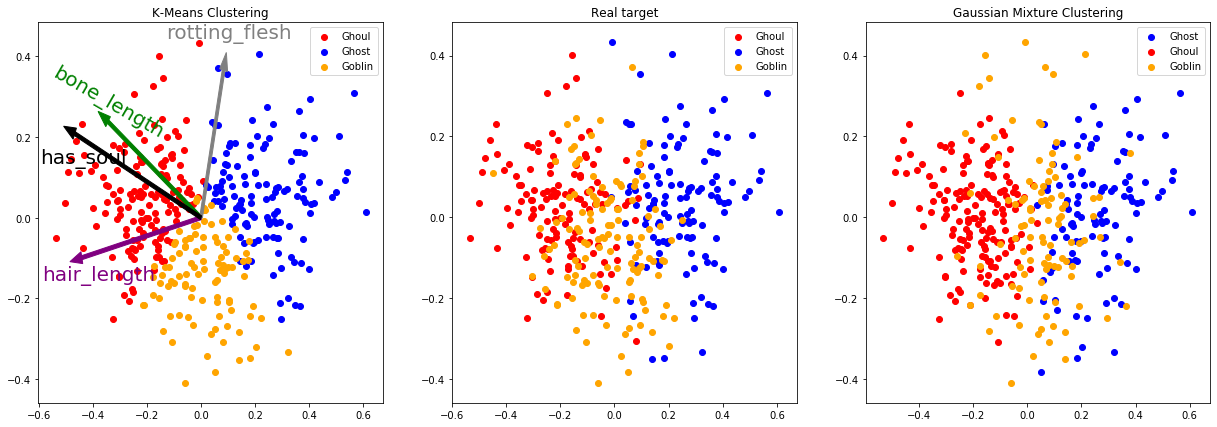

In [13]:
fig = plt.figure(figsize=(21,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

X_1 = model_pred_0.f1
Y_1 = model_pred_0.f2
X_2 = model_pred_1.f1
Y_2 = model_pred_1.f2
X_3 = model_pred_2.f1
Y_3 = model_pred_2.f2

ax1.scatter(X_1,Y_1, color="r",label="Ghoul")
ax1.scatter(X_2,Y_2, color="b",label="Ghost")
ax1.scatter(X_3,Y_3, color="orange",label="Goblin")
ax1.arrow(0,0,pca.components_[0,0], pca.components_[1,0], color="g", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,1]*0.4, pca.components_[1,1]*0.4, color="gray", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,2]*0.7, pca.components_[1,2]*0.7, color="purple", alpha=1,width=0.01)
ax1.arrow(0,0,pca.components_[0,3]*0.7, pca.components_[1,3]*0.7, color="black", alpha=1,width=0.01)
ax1.text(pca.components_[0,0], pca.components_[1,0]*1.2, "bone_length",ha="center",color="g",va="center",rotation=-30,fontsize=20)
ax1.text(pca.components_[0,1]*0.5, pca.components_[1,1]*0.5, "rotting_flesh",ha="center",color="gray" ,va="center",fontsize=20)
ax1.text(pca.components_[0,2]*0.6, pca.components_[1,2], "hair_length",ha="center",color="purple",va="center",fontsize=20)
ax1.text(pca.components_[0,3]*0.65, pca.components_[1,3]*0.5, "has_soul",ha="center",color="black", va="center",fontsize=20)
ax1.title.set_text("K-Means Clustering")
ax1.legend(loc="upper right")

X_1_2 = true_0.f1
Y_1_2 = true_0.f2
X_2_2 = true_1.f1
Y_2_2 = true_1.f2
X_3_2 = true_2.f1
Y_3_2 = true_2.f2

ax2.scatter(X_1_2,Y_1_2, color="r",label="Ghoul")
ax2.scatter(X_2_2,Y_2_2, color="b",label="Ghost")
ax2.scatter(X_3_2,Y_3_2, color="orange",label="Goblin")
ax2.title.set_text("Real target")
ax2.legend(loc="upper right")

X_1_3 = gm_pred_0.f1
Y_1_3 = gm_pred_0.f2
X_2_3 = gm_pred_1.f1
Y_2_3 = gm_pred_1.f2
X_3_3 = gm_pred_2.f1
Y_3_3 = gm_pred_2.f2

ax3.scatter(X_1_3,Y_1_3, color="b",label="Ghost")
ax3.scatter(X_2_3,Y_2_3, color="r",label="Ghoul")
ax3.scatter(X_3_3,Y_3_3, color="orange",label="Goblin")
ax3.title.set_text("Gaussian Mixture Clustering")
ax3.legend(loc="upper right")

plt.show()

첫번쩨 plot에 주성분1, 2에 대해 각 Feature들의 고유벡터를 나타내어,

Feature별로 영향을 끼치는 정도를 나타냈습니다.

Ghoul, Ghost에 대해 Goblin은 Rotting flesh Feature에서 분류됨을 알 수 있고,

Ghoul과 Ghost는 나머지 bone length, has soul, hair length들이 분류에 영향을 많이 줌을 알 수 있습니다.

가운데 그래프는 실제 분류 Label을 붙인 것으로 Goblin이 다른 분류 속에 많이 포함됨을 알 수 있습니다.

실제로 위 데이터 분석단계에서 분포를 나타냈을 때도, Goblin데이터는 나머지 두 Type의 분포와 많이 겹쳐 분류에 어려움을 주었음을 알 수 있습니다.

### 3D plot

In [14]:
pca_2 = PCA(n_components=3)
pca_result_2=pca_2.fit_transform(x)
pca_df_2 = pd.DataFrame(pca_result_2, columns=["f1","f2","f3"])
pca_df_2["kmean_result"]=model_pred
pca_df_2["real"]=true_y

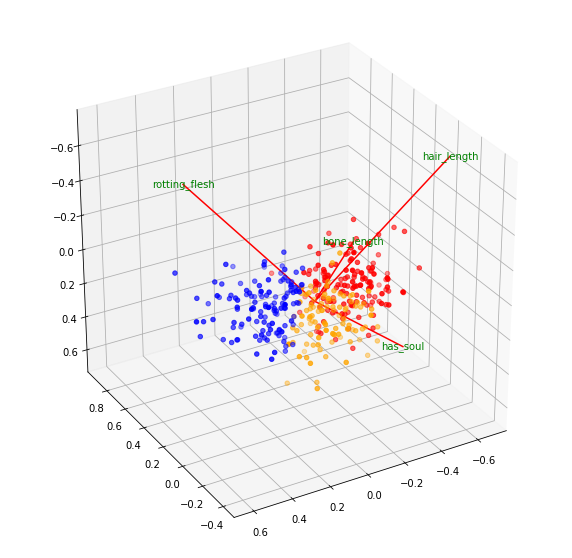

In [15]:
draw_3d_plot(pca_df_2,pca_2,210,120)

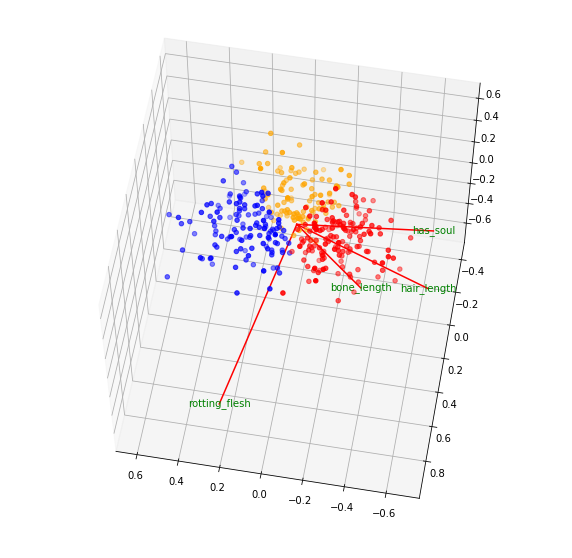

In [16]:
draw_3d_plot(pca_df_2,pca_2,60,100)

# 5. Advance

분류하기 어려운 Goblin을 배제하고 Ghost, Ghoul로 분류한 뒤, 다시 두 데이터 속에서 각각 Clustering을 했을 때의 정확도 확인을 위한 과정

/Users/jaemin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jaemin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[[122   7   0]
 [  2 115   0]
 [ 77  48   0]]


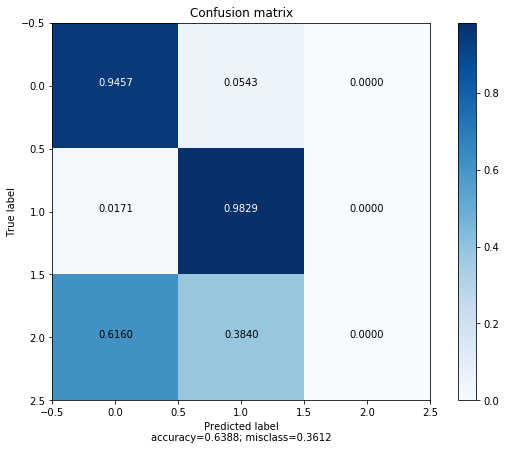

[[64 58  0]
 [ 1  1  0]
 [15 62  0]]


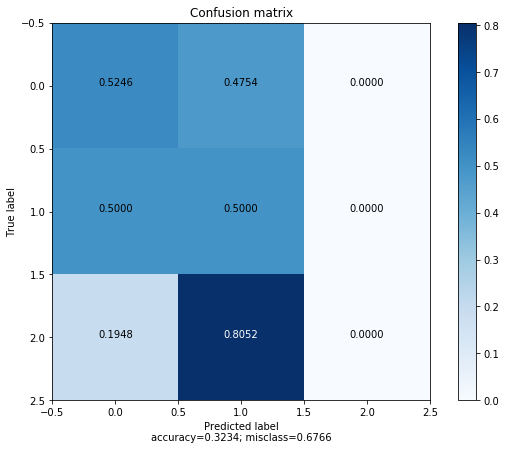

[[ 4  3  0]
 [84 31  0]
 [14 34  0]]


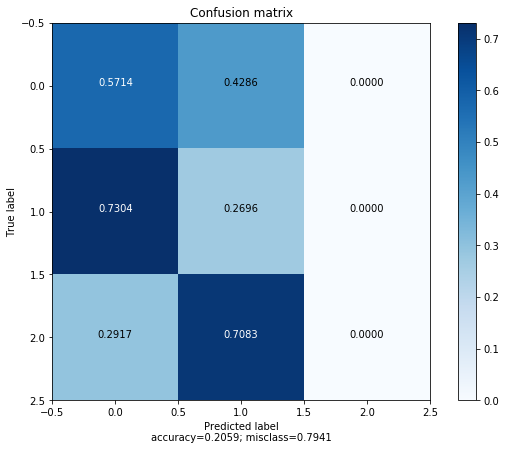

In [17]:
model = KMeans(n_clusters=2).fit(x)
model_pred = model.predict(x)

x["first_clust"] = model_pred
x["real_clust"] = true_y

x_0 = x[x["first_clust"]==0]
x_1 = x[x["first_clust"]==1]

model_2 = KMeans(n_clusters=2).fit(x_0[x_0.columns[:-1]])
model_2_pred = model_2.predict(x_0[x_0.columns[:-1]])

model_3 = KMeans(n_clusters=2).fit(x_1[x_1.columns[:-1]])
model_3_pred = model_3.predict(x_1[x_1.columns[:-1]])

x_0.reset_index(drop=True, inplace=True)
x_1.reset_index(drop=True, inplace=True)

x_0["0_second_pred"]=model_2_pred
x_1["1_second_pred"]=model_3_pred

print(confusion_matrix(x["real_clust"], x["first_clust"]))
plot_confusion_matrix(confusion_matrix(x["real_clust"], x["first_clust"]))
print(confusion_matrix(x_0["real_clust"],x_0["0_second_pred"]))
plot_confusion_matrix(confusion_matrix(x_0["real_clust"],x_0["0_second_pred"]))
print(confusion_matrix(x_1["real_clust"],x_1["1_second_pred"]))
plot_confusion_matrix(confusion_matrix(x_1["real_clust"],x_1["1_second_pred"]))

첫번째 매트릭스 : 라벨 0, 1로 크게 분리 / 원래의 라벨 2는 라벨 0과 1에 속해져있는 상태

두번째 매트릭스 : 라벨 0으로 들어간 것에 대해 다시 라벨 0과 3(여기서는 2로 표시)로 분리

세번째 매트릭스 : 라벨 1로 분류된 것에 대하 다시 라벨 1(여기서는 0으로 표시), 라벨2(여기서는 라벨1로 표시)로 분리

Lable2 에 대한 분류는 전체 125개의 데이터 중 96개를 분류함으로써 기존보다 잘 Clustering되었지만 Label0과 1은 정확도가 많이 낮아짐

결과에서 알 수 있듯이 전체적인 정확도에서 큰 차이가 발생하지 않음을 확인, 데이터간의 거리로 분류하는 K means 모델에서, 데이터들이 섞여 있어 쉽게 나누어지지않음을 확인